In [1]:
# -*- coding: utf-8 -*-

""" Auto Encoder Example.
Using an auto encoder on MNIST handwritten digits.
References:
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.
Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/
"""
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
import tflearn

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [2]:

# Building the encoder
encoder = tflearn.input_data(shape=[None, 784])
encoder = tflearn.fully_connected(encoder, 256)
encoder = tflearn.fully_connected(encoder, 64)

# Building the decoder
decoder = tflearn.fully_connected(encoder, 256)
decoder = tflearn.fully_connected(decoder, 784, activation='sigmoid')

# Regression, with mean square error
net = tflearn.regression(decoder, optimizer='adam', learning_rate=0.001,
                         loss='mean_square', metric=None)
model = tflearn.DNN(net, tensorboard_verbose=0)


In [3]:


# Training the auto encoder

model.fit(X, X, n_epoch=20, validation_set=(testX, testX),
          run_id="auto_encoder", batch_size=256)

# Encoding X[0] for test
print("\nTest encoding of X[0]:")
# New model, re-using the same session, for weights sharing
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))

# Testing the image reconstruction on new data (test set)
print("\nVisualizing results after being encoded and decoded:")
testX = tflearn.data_utils.shuffle(testX)[0]
# Applying encode and decode over test set
encode_decode = model.predict(testX)
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    temp = [[ii, ii, ii] for ii in list(testX[i])]
    a[0][i].imshow(np.reshape(temp, (28, 28, 3)))
    temp = [[ii, ii, ii] for ii in list(encode_decode[i])]
    a[1][i].imshow(np.reshape(temp, (28, 28, 3)))
f.show()
plt.draw()


Training Step: 4299  | total loss: 0.00814 | time: 15.406s
| Adam | epoch: 020 | loss: 0.00814 -- iter: 54784/55000
Training Step: 4300  | total loss: 0.00818 | time: 16.553s
| Adam | epoch: 020 | loss: 0.00818 | val_loss: 0.00777 -- iter: 55000/55000
--

Test encoding of X[0]:
[[4.046037197113037, 0.5489853620529175, -0.9841365218162537, -2.558471202850342, -2.068419933319092, -3.326977491378784, -1.001204490661621, -3.1855621337890625, -2.672685384750366, 6.399127960205078, 1.002844214439392, -3.3556714057922363, -6.1376261711120605, 3.7265491485595703, 0.1433783769607544, 7.06318998336792, 0.4925454556941986, 3.1403937339782715, 2.916256904602051, -0.8580623865127563, -2.0658745765686035, -0.8948999643325806, 4.692139148712158, -0.07498571276664734, 0.8052454590797424, -0.9710595011711121, -3.5420479774475098, -0.4416476786136627, 0.1523379534482956, 1.8748606443405151, 4.4508957862854, 0.4139412045478821, 3.93440842628479, -0.842342734336853, 5.345846652984619, -0.09705936908721924

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


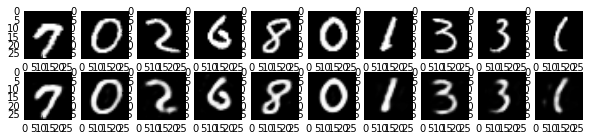

In [4]:
%matplotlib inline
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    temp = [[ii, ii, ii] for ii in list(testX[i])]
    a[0][i].imshow(np.reshape(temp, (28, 28, 3)))
    temp = [[ii, ii, ii] for ii in list(encode_decode[i])]
    a[1][i].imshow(np.reshape(temp, (28, 28, 3)))
f.show()
plt.draw()


In [5]:
print(encoding_model.predict([X[0]]))
model.save('encode_decode.tflearn')

[[4.046037197113037, 0.5489853620529175, -0.9841365218162537, -2.558471202850342, -2.068419933319092, -3.326977491378784, -1.001204490661621, -3.1855621337890625, -2.672685384750366, 6.399127960205078, 1.002844214439392, -3.3556714057922363, -6.1376261711120605, 3.7265491485595703, 0.1433783769607544, 7.06318998336792, 0.4925454556941986, 3.1403937339782715, 2.916256904602051, -0.8580623865127563, -2.0658745765686035, -0.8948999643325806, 4.692139148712158, -0.07498571276664734, 0.8052454590797424, -0.9710595011711121, -3.5420479774475098, -0.4416476786136627, 0.1523379534482956, 1.8748606443405151, 4.4508957862854, 0.4139412045478821, 3.93440842628479, -0.842342734336853, 5.345846652984619, -0.09705936908721924, -2.6893246173858643, 2.2520101070404053, -0.3132175803184509, -1.5409224033355713, 0.6368064284324646, -0.1476631760597229, -1.775817632675171, -1.6568127870559692, -2.837540864944458, -3.889625072479248, 1.891249418258667, 2.4648325443267822, -4.6508870124816895, 0.7348897457

In [6]:
model.load('encode_decode.tflearn')
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))


[[4.046037197113037, 0.5489853620529175, -0.9841365218162537, -2.558471202850342, -2.068419933319092, -3.326977491378784, -1.001204490661621, -3.1855621337890625, -2.672685384750366, 6.399127960205078, 1.002844214439392, -3.3556714057922363, -6.1376261711120605, 3.7265491485595703, 0.1433783769607544, 7.06318998336792, 0.4925454556941986, 3.1403937339782715, 2.916256904602051, -0.8580623865127563, -2.0658745765686035, -0.8948999643325806, 4.692139148712158, -0.07498571276664734, 0.8052454590797424, -0.9710595011711121, -3.5420479774475098, -0.4416476786136627, 0.1523379534482956, 1.8748606443405151, 4.4508957862854, 0.4139412045478821, 3.93440842628479, -0.842342734336853, 5.345846652984619, -0.09705936908721924, -2.6893246173858643, 2.2520101070404053, -0.3132175803184509, -1.5409224033355713, 0.6368064284324646, -0.1476631760597229, -1.775817632675171, -1.6568127870559692, -2.837540864944458, -3.889625072479248, 1.891249418258667, 2.4648325443267822, -4.6508870124816895, 0.7348897457

In [7]:
compressed = encoding_model.predict(X)
print(compressed[:1])

[[4.0460357666015625, 0.5489861369132996, -0.9841365218162537, -2.5584707260131836, -2.0684211254119873, -3.3269779682159424, -1.001204490661621, -3.1855626106262207, -2.672685146331787, 6.399129867553711, 1.0028440952301025, -3.3556716442108154, -6.137624263763428, 3.726548910140991, 0.14337803423404694, 7.063190460205078, 0.49254533648490906, 3.140392303466797, 2.9162590503692627, -0.8580620288848877, -2.0658740997314453, -0.8949006795883179, 4.692138195037842, -0.07498592138290405, 0.8052453994750977, -0.971059262752533, -3.542048215866089, -0.4416487514972687, 0.1523371785879135, 1.8748613595962524, 4.4508957862854, 0.4139419198036194, 3.9344098567962646, -0.842342734336853, 5.345847129821777, -0.09705957770347595, -2.689324378967285, 2.2520103454589844, -0.31321775913238525, -1.5409231185913086, 0.6368062496185303, -0.14766347408294678, -1.7758162021636963, -1.656813621520996, -2.837542772293091, -3.8896236419677734, 1.891249418258667, 2.464832305908203, -4.650888442993164, 0.7348

In [8]:
imgSearch = X[0]

compressedSearch = encoding_model.predict([imgSearch])

In [9]:
Y2 = np.array(compressedSearch, dtype=np.float32)
Y2

array([[ 4.0460372 ,  0.54898536, -0.98413652, -2.5584712 , -2.06841993,
        -3.32697749, -1.00120449, -3.18556213, -2.67268538,  6.39912796,
         1.00284421, -3.35567141, -6.13762617,  3.72654915,  0.14337838,
         7.06318998,  0.49254546,  3.14039373,  2.9162569 , -0.85806239,
        -2.06587458, -0.89489996,  4.69213915, -0.07498571,  0.80524546,
        -0.9710595 , -3.54204798, -0.44164768,  0.15233795,  1.87486064,
         4.45089579,  0.4139412 ,  3.93440843, -0.84234273,  5.34584665,
        -0.09705937, -2.68932462,  2.25201011, -0.31321758, -1.5409224 ,
         0.63680643, -0.14766318, -1.77581763, -1.65681279, -2.83754086,
        -3.88962507,  1.89124942,  2.46483254, -4.65088701,  0.73488975,
        -1.89464056,  0.1256941 , -1.12129831,  4.42104721, -0.44163907,
        -1.75685477, -2.80221772, -0.15730166, -0.19157477,  2.04186034,
         2.52572036, -3.05611539,  5.55074024, -2.65543604]], dtype=float32)

In [10]:
X2 = np.array(compressed, dtype=np.float32)
X2

array([[ 4.04603577,  0.54898614, -0.98413652, ..., -3.05611396,
         5.5507369 , -2.65543485],
       [ 3.11716652,  4.91006708,  2.52304029, ...,  1.39021063,
        -2.8191452 , -2.1669724 ],
       [ 1.44438457, -1.79813015,  1.75973034, ..., -2.29721355,
        -4.82513189,  1.09444833],
       ..., 
       [ 2.18934894,  0.57654136,  1.43757248, ...,  3.57240224,
        -2.23132968, -0.66687095],
       [ 3.91606021, -0.62158352, -4.46595907, ...,  2.860641  ,
         2.94244003,  0.95672804],
       [ 3.56800771,  0.7042588 ,  4.51066399, ...,  1.78600895,
         1.25458705, -1.73642302]], dtype=float32)

In [11]:
Delta = X2 - Y2
Delta

array([[ -1.43051147e-06,   7.74860382e-07,   0.00000000e+00, ...,
          1.43051147e-06,  -3.33786011e-06,   1.19209290e-06],
       [ -9.28870678e-01,   4.36108160e+00,   3.50717688e+00, ...,
          4.44632626e+00,  -8.36988544e+00,   4.88463640e-01],
       [ -2.60165262e+00,  -2.34711552e+00,   2.74386692e+00, ...,
          7.58901834e-01,  -1.03758717e+01,   3.74988437e+00],
       ..., 
       [ -1.85668826e+00,   2.75560021e-02,   2.42170906e+00, ...,
          6.62851763e+00,  -7.78207016e+00,   1.98856509e+00],
       [ -1.29976988e-01,  -1.17056894e+00,  -3.48182249e+00, ...,
          5.91675663e+00,  -2.60830021e+00,   3.61216402e+00],
       [ -4.78029490e-01,   1.55273438e-01,   5.49480057e+00, ...,
          4.84212446e+00,  -4.29615307e+00,   9.19013023e-01]], dtype=float32)

In [12]:
sqrtDistance = np.sqrt(np.square(Delta))
sqrtDistance

array([[  1.43051147e-06,   7.74860382e-07,   0.00000000e+00, ...,
          1.43051147e-06,   3.33786011e-06,   1.19209290e-06],
       [  9.28870678e-01,   4.36108160e+00,   3.50717688e+00, ...,
          4.44632626e+00,   8.36988544e+00,   4.88463640e-01],
       [  2.60165262e+00,   2.34711552e+00,   2.74386692e+00, ...,
          7.58901834e-01,   1.03758717e+01,   3.74988437e+00],
       ..., 
       [  1.85668826e+00,   2.75560021e-02,   2.42170906e+00, ...,
          6.62851763e+00,   7.78207016e+00,   1.98856509e+00],
       [  1.29976988e-01,   1.17056894e+00,   3.48182249e+00, ...,
          5.91675663e+00,   2.60830021e+00,   3.61216402e+00],
       [  4.78029490e-01,   1.55273438e-01,   5.49480057e+00, ...,
          4.84212446e+00,   4.29615307e+00,   9.19013023e-01]], dtype=float32)

In [13]:
sumDistance = sqrtDistance.sum(axis=1)
sumDistance

array([  4.15146351e-05,   1.93311890e+02,   1.92791138e+02, ...,
         1.86418472e+02,   1.79844452e+02,   1.63248260e+02], dtype=float32)

In [14]:
order = np.argsort(sumDistance)
order

array([    0, 45910, 34534, ..., 14216, 41892, 14399])

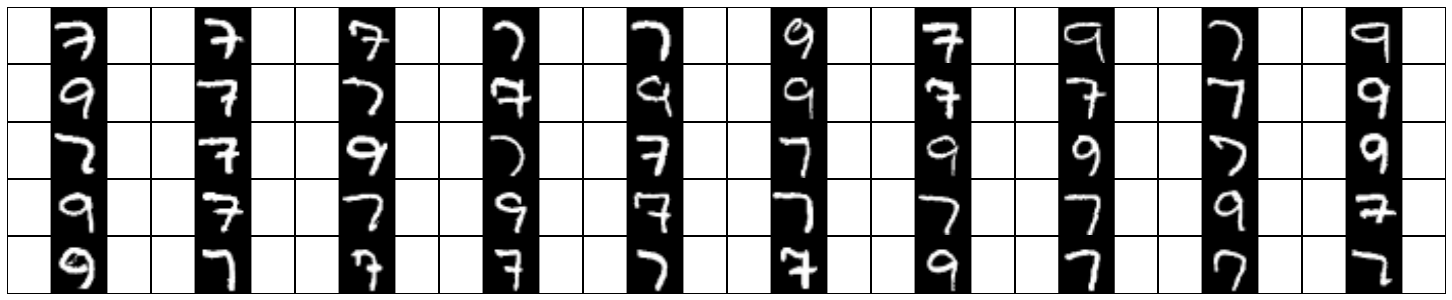

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=10, sharex=True, sharey=True, figsize=(20,4))
ind=0
for row in axes:
    for ax in row:
        img = X[order[ind]]
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind+=1

fig.tight_layout(pad=0.1)

# Check-point --- para novos testes começar direto aqui

In [1]:
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
import tflearn

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)



Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [2]:
# Building the encoder
encoder = tflearn.input_data(shape=[None, 784])
encoder = tflearn.fully_connected(encoder, 256)
encoder = tflearn.fully_connected(encoder, 64)

# Building the decoder
decoder = tflearn.fully_connected(encoder, 256)
decoder = tflearn.fully_connected(decoder, 784, activation='sigmoid')

# Regression, with mean square error
net = tflearn.regression(decoder, optimizer='adam', learning_rate=0.001,
                         loss='mean_square', metric=None)
model = tflearn.DNN(net, tensorboard_verbose=0)


model.load('encode_decode.tflearn')
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))

[[4.046037197113037, 0.5489853620529175, -0.9841365218162537, -2.558471202850342, -2.068419933319092, -3.326977491378784, -1.001204490661621, -3.1855621337890625, -2.672685384750366, 6.399127960205078, 1.002844214439392, -3.3556714057922363, -6.1376261711120605, 3.7265491485595703, 0.1433783769607544, 7.06318998336792, 0.4925454556941986, 3.1403937339782715, 2.916256904602051, -0.8580623865127563, -2.0658745765686035, -0.8948999643325806, 4.692139148712158, -0.07498571276664734, 0.8052454590797424, -0.9710595011711121, -3.5420479774475098, -0.4416476786136627, 0.1523379534482956, 1.8748606443405151, 4.4508957862854, 0.4139412045478821, 3.93440842628479, -0.842342734336853, 5.345846652984619, -0.09705936908721924, -2.6893246173858643, 2.2520101070404053, -0.3132175803184509, -1.5409224033355713, 0.6368064284324646, -0.1476631760597229, -1.775817632675171, -1.6568127870559692, -2.837540864944458, -3.889625072479248, 1.891249418258667, 2.4648325443267822, -4.6508870124816895, 0.7348897457

In [20]:

def euclidean_distance(lista, imagem):
    return distance(lista, imagem, True)

def chi_squared_distance(lista, imagem):
    return distance(lista, imagem, False)

def distance(lista, imagem, euclidean=True):
    squaredDistance = np.square(lista - imagem)
    if (euclidean==False):
        squaredDistance = squaredDistance / (np.abs(lista) + np.abs(imagem)+1)
    squareTree = np.sqrt(squaredDistance)
    distance = squareTree.sum(axis=1)
    return distance

listSearch = np.array(encoding_model.predict(X), dtype=np.float32)

def montaListaOrdenada(imagem, euclidean):
    compressedSearch = np.array(encoding_model.predict([imagem]), dtype=np.float32)
    sqrtDistance = distance(listSearch, compressedSearch, euclidean)
    order = np.argsort(sqrtDistance)
    return order

def montaListaOrdenadaSemCompressao(imagem, euclidean):
    sqrtDistance = distance(X, imagem, euclidean)
    order = np.argsort(sqrtDistance)
    return order


In [21]:
X.shape

(55000, 784)

In [23]:
import time
current_milli_time = lambda: int(round(time.time() * 1000))
t0 = time.time()
print(time.asctime(time.localtime(t0)))
order = montaListaOrdenada(X[0], False)
t1 = time.time()
print(time.asctime(time.localtime(t1)))
print(int((t1-t0)*1000))
print(order)
order2 = montaListaOrdenadaSemCompressao(X[0], False)
t2 = time.time()
print(time.asctime(time.localtime(t1)))
print(int((t2-t1)*1000))
print(order2)

Wed Jun 21 21:23:08 2017
Wed Jun 21 21:23:08 2017
62
[    0 45910 34534 ..., 12285 50251 14399]
Wed Jun 21 21:23:08 2017
410
[    0 51900 49940 ..., 49927 54452   469]


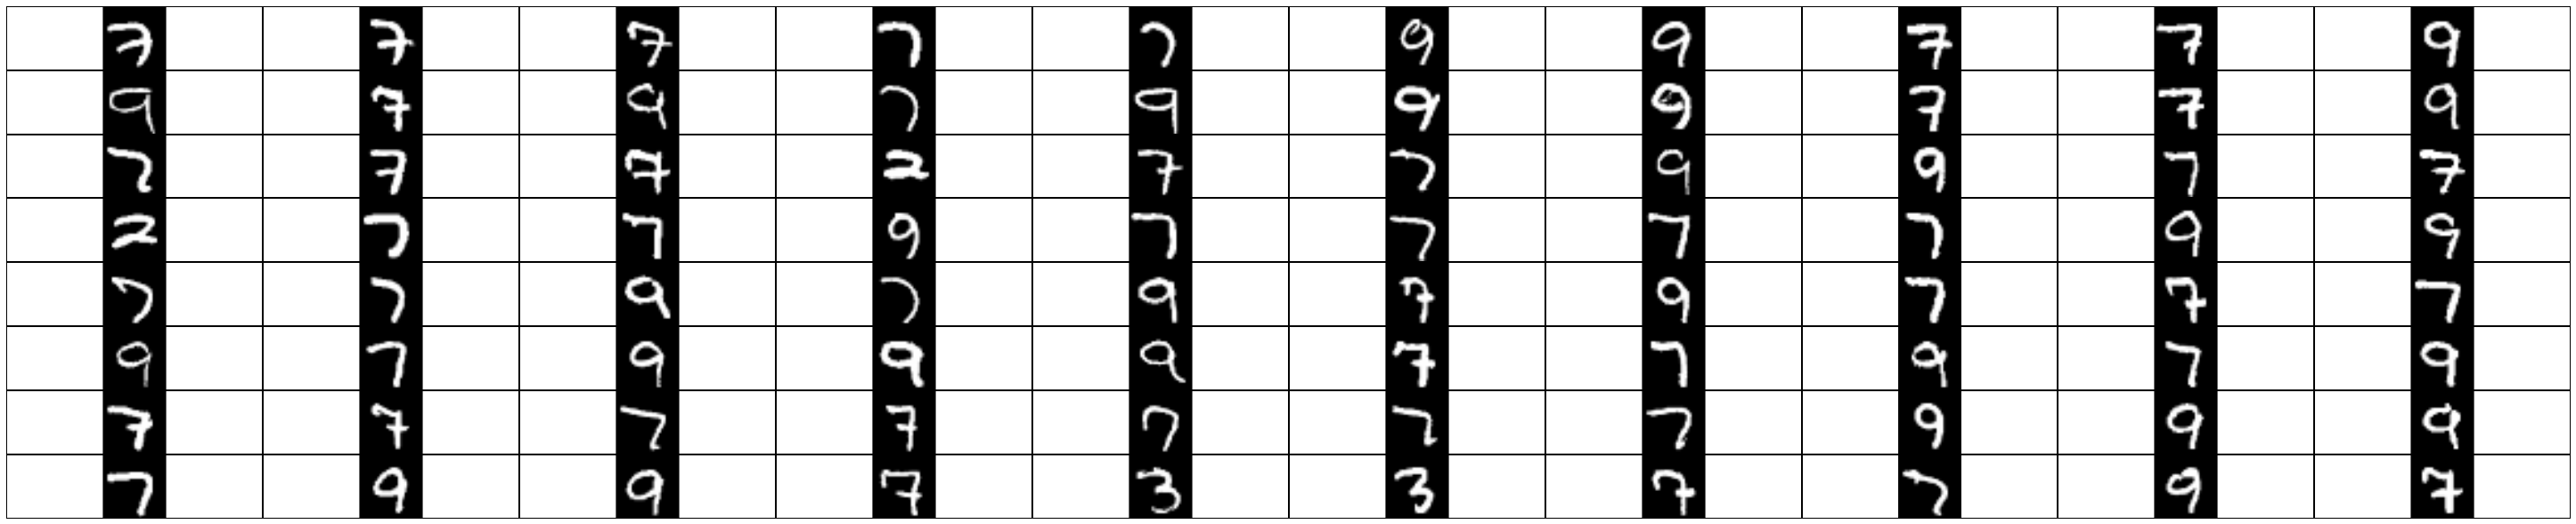

In [6]:
%matplotlib inline
fig, axes = plt.subplots(nrows=8, ncols=10, sharex=True, sharey=True, figsize=(40,8))
ind=0
for row in axes:
    for ax in row:
        img = X[order[ind]]
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind+=1

fig.tight_layout(pad=0.1)

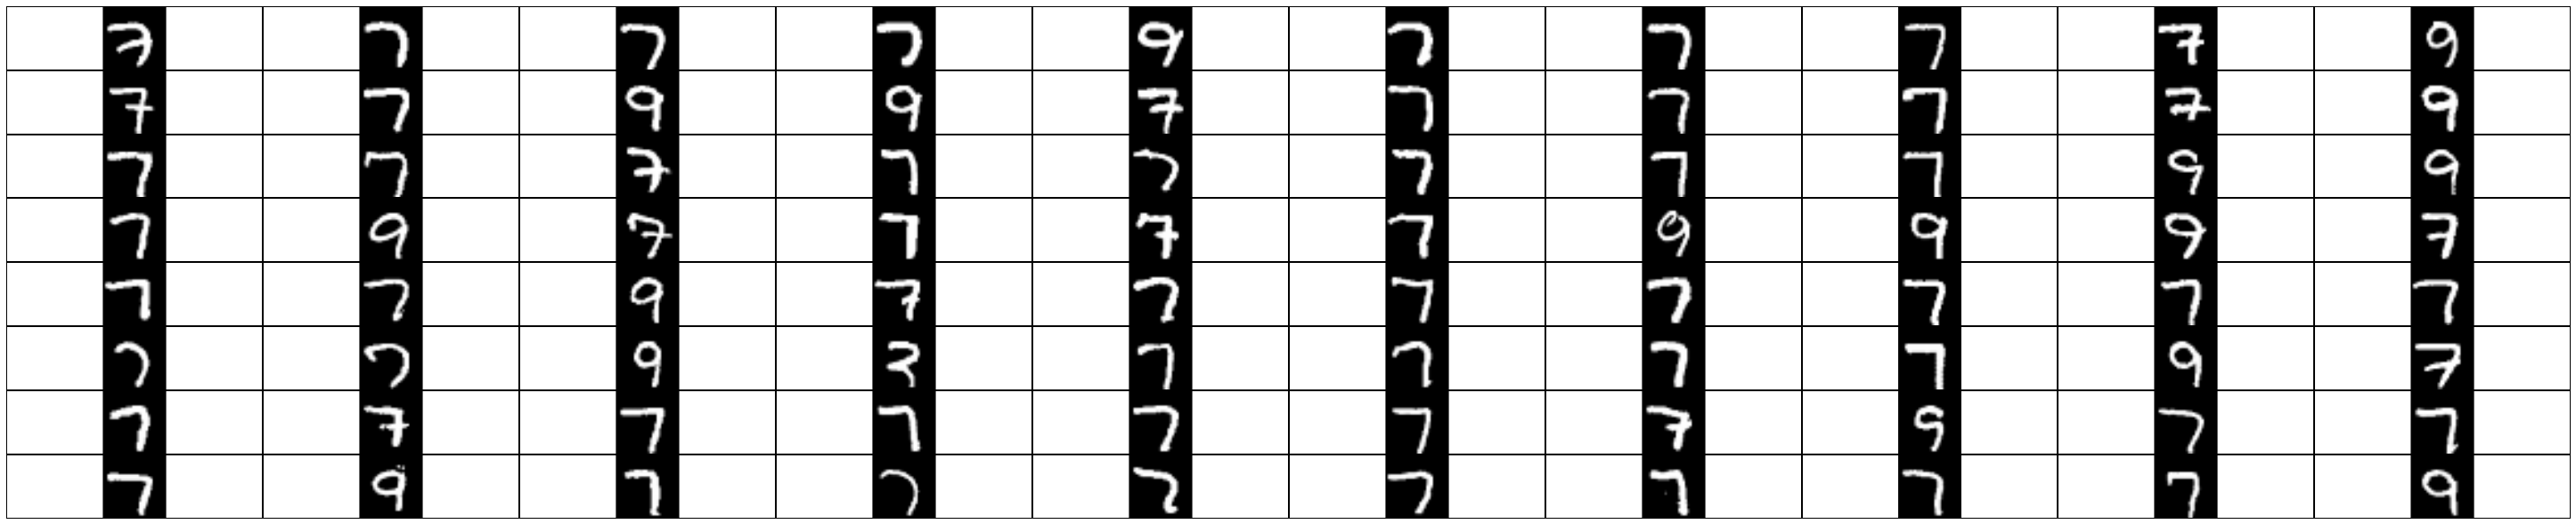

In [7]:
%matplotlib inline
fig, axes = plt.subplots(nrows=8, ncols=10, sharex=True, sharey=True, figsize=(40,8))
ind=0
for row in axes:
    for ax in row:
        img = X[order2[ind]]
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind+=1

fig.tight_layout(pad=0.1)

In [24]:
import time
t0 = time.time()
print(time.asctime(time.localtime(t0)))
order = montaListaOrdenada(X[0], True)
t1 = time.time()
print(time.asctime(time.localtime(t1)))
print(int((t1-t0)*1000))
print(order)
order2 = montaListaOrdenadaSemCompressao(X[0], True)
t2 = time.time()
print(time.asctime(time.localtime(t1)))
print(int((t2-t1)*1000))
print(order2)

Wed Jun 21 21:23:16 2017
Wed Jun 21 21:23:16 2017
26
[    0 45910 34534 ..., 14216 41892 14399]
Wed Jun 21 21:23:16 2017
184
[    0 51900 49940 ..., 49927 54452   469]


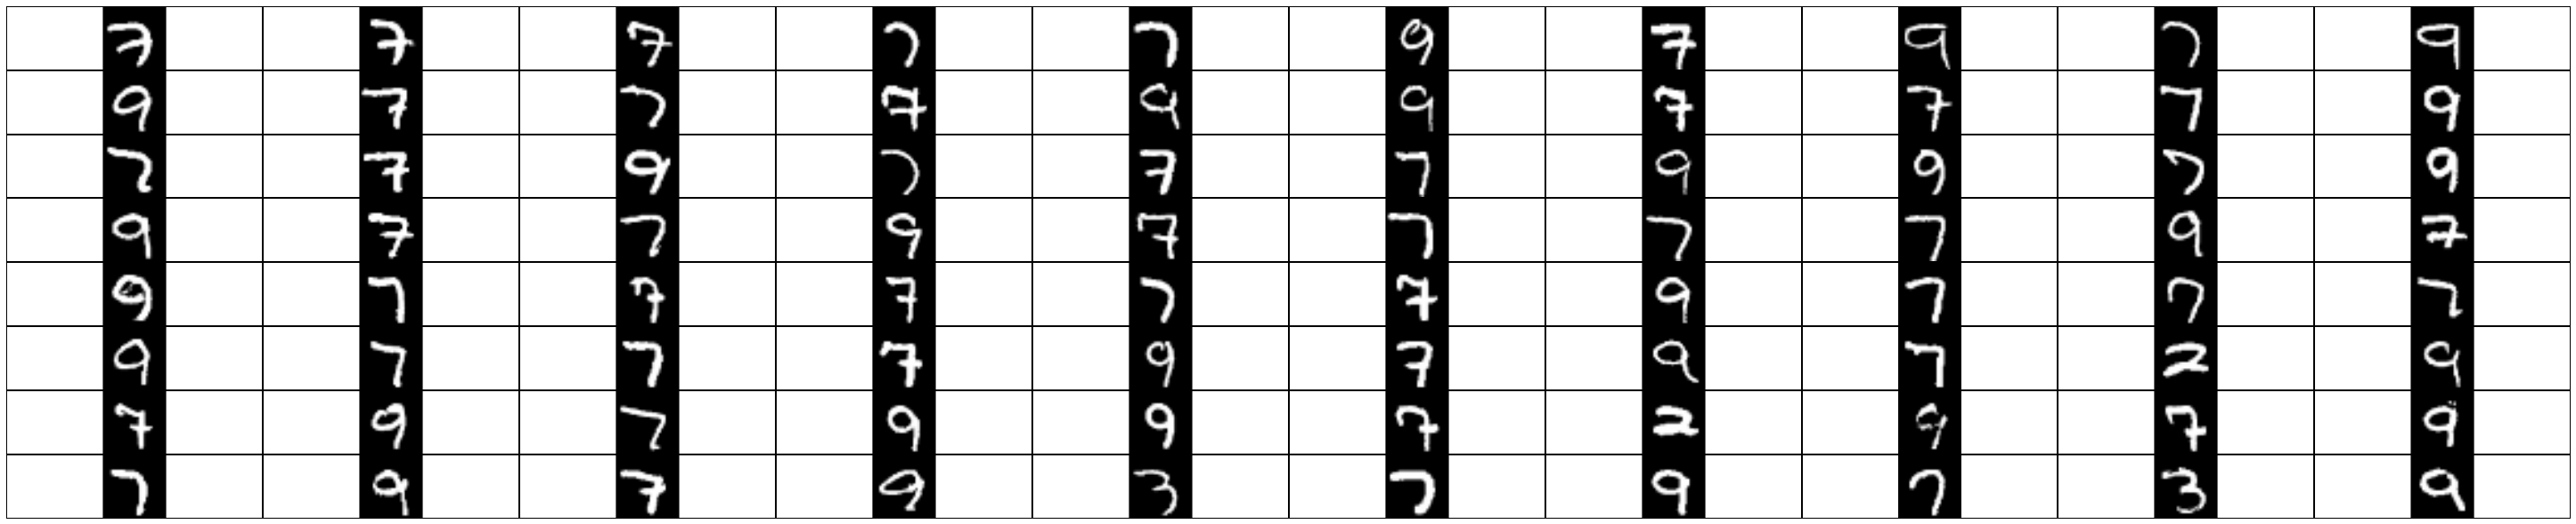

In [55]:
%matplotlib inline
fig, axes = plt.subplots(nrows=8, ncols=10, sharex=True, sharey=True, figsize=(40,8))
ind=0
for row in axes:
    for ax in row:
        img = X[order[ind]]
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind+=1

fig.tight_layout(pad=0.1)

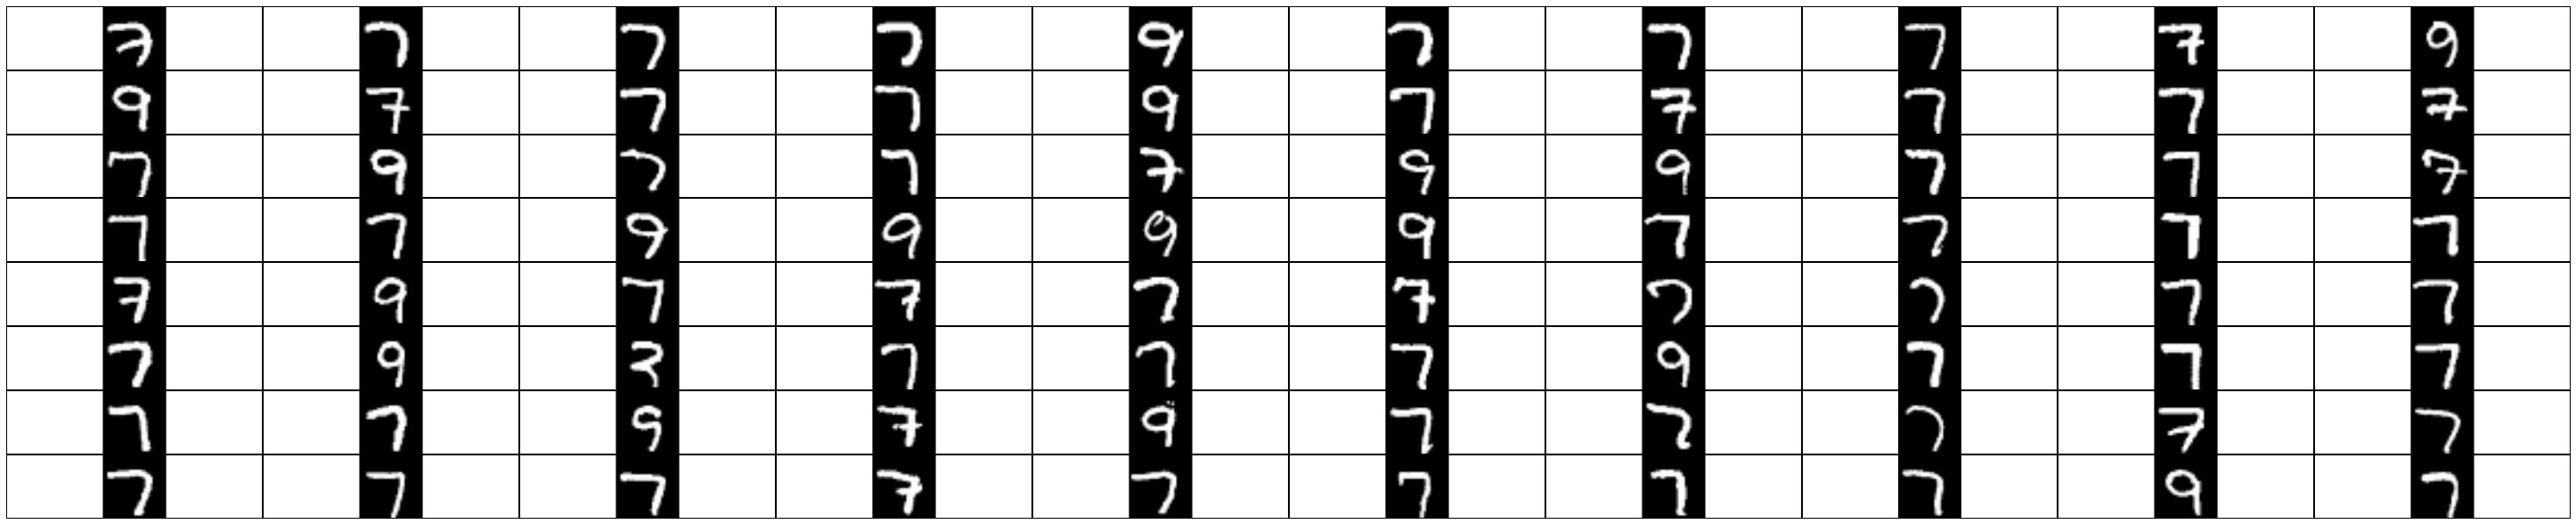

In [56]:
%matplotlib inline
fig, axes = plt.subplots(nrows=8, ncols=10, sharex=True, sharey=True, figsize=(40,8))
ind=0
for row in axes:
    for ax in row:
        img = X[order2[ind]]
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ind+=1

fig.tight_layout(pad=0.1)

In [49]:
listSearch = np.array(encoding_model.predict(X), dtype=np.float32)
listSearch.shape

(55000, 64)

In [50]:
#Testar com lista 4 vezes maior
listSearch = np.tile(listSearch, (100, 1))
listSearch.shape

(5500000, 64)

In [40]:
Xold = X
X = np.tile(X, (8, 1))
X.shape

(440000, 784)

In [51]:
t0 = time.time()
print(time.asctime(time.localtime(t0)))
order = montaListaOrdenada(X[0], True)
t1 = time.time()
print(time.asctime(time.localtime(t1)))
print(int((t1-t0)*1000))
print(order)


Wed Jun 21 21:33:17 2017
Wed Jun 21 21:33:20 2017
3147
[      0 4345000 3355000 ...,  949399 3644399 4139399]


# Nada mal... 3 segundos para pesquisar em 5 milhões de imagens

, que é a carga prevista para Santos inicialmente, em um notebook relativamente comum. Em torno de 1.5GB de memória utilizados.

Se for possível comprimir as imagens de escâner, que são menores, para este tamanho, o algoritmo parece bem viável.

Poderia ser testado também o uso de tipo de dados int8, se não perde muita informação.


O teste com a imagem inteira, sem a compressão do Encoder, foi inviável. O consumo de memória foi muito alto a partir de 300.000 registros, chegando a travar a interface gráfica do notebook e os tempos continuaram sendo em torno de 10 vezes maiores que a versão comprimida, mesmo a versão comprimidade tendo que fazer, antes da busca, a compressão da imagem buscada.

In [43]:
del X
del listSearch
X = Xold


In [42]:
#Quantidade de imagens de escâner esperada na ALFSTS a pesquisar/gerenciar

3000*365*5

5475000